In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import annotate
import n_1rxi as method
import plot_utils

In [2]:
chunk_size = 50

In [3]:
fname = method.__file__.split('/')[-1][:-3].replace('x', str(chunk_size)) + '-omni'
fname

'n_1r50i-omni'

In [4]:
import rate
rate.setkey(1,'gpt')
rate.model = 'gpt-4o'

In [5]:
source = annotate.get_clean()

In [6]:
source = source.sample(frac=1, random_state=8)

In [7]:
requests = await method.rate(source, chunk_size=chunk_size)

Request 1 of 90
Request 2 of 90
Request 3 of 90
Request 4 of 90
Request 5 of 90
Request 6 of 90
Request 7 of 90
Request 8 of 90
Request 9 of 90
Request 10 of 90
Request 11 of 90
Request 12 of 90
Request 13 of 90
Request 14 of 90
Request 15 of 90
Request 16 of 90
Request 17 of 90
Request 18 of 90
Request 19 of 90
Request 20 of 90
Request 21 of 90
Request 22 of 90
Request 23 of 90
Request 24 of 90
Request 25 of 90
Request 26 of 90
Request 27 of 90
Request 28 of 90
Request 29 of 90
Request 30 of 90
Request 31 of 90
Request 32 of 90
Request 33 of 90
Request 34 of 90
Request 35 of 90
Request 36 of 90
Request 37 of 90
Request 38 of 90
Request 39 of 90
Request 40 of 90
Request 41 of 90
Request 42 of 90
Request 43 of 90
Request 44 of 90
Request 45 of 90
Request 46 of 90
Request 47 of 90
Request 48 of 90
Request 49 of 90
Request 50 of 90
Request 51 of 90
Request 52 of 90
Request 53 of 90
Request 54 of 90
Request 55 of 90
Request 56 of 90
Request 57 of 90
Request 58 of 90
Request 59 of 90
Reques

In [11]:
failed = method.process(requests)

Failed parse (chunk 0, request #60). Prompt:
'''We aim to evaluate the creativity of ideas in an Alternative Uses Tests (AUT) based on specific criteria. Please rate our ideas, given below, in terms of their Novelty, which is defined as follows:
Novelty: Rate the novelty of the idea on a scale of 1 to 100, with 1 being not novel at all and 100 being extremely novel. Consider how unique, original, or surprising the idea is, while disregarding its feasibility and value.

Proceed as follows in your evaluation. Write 3 lines for each item in the list below. On the first line, write the item number and briefly describe the idea in your own words. On the second line, consider other unconventional uses of the item, including those listed, and compare the idea to these in terms of its Novelty. Finally, on the third line, provide your numeric rating as a json object of the form {"novelty":x}. Evaluate each idea in the order provided, leaving one empty line between evaluations. Do evaluate each 

In [12]:
temp = 0.1
while temp < 0.5:
    await rate.entrypoint(failed, temperature=temp)
    failed = method.process(failed)
    temp += .1

Request 1 of 1


In [13]:
source.to_excel(f'gpt-ratings/{fname}.xlsx')

In [14]:
source = pd.read_excel(f'gpt-ratings/{fname}.xlsx').set_index('Unnamed: 0')

In [15]:
corr = {key: stats.spearmanr(source[[key.capitalize(), key]]) for key in annotate.measures}
corr

{'novelty': SignificanceResult(statistic=0.6408272453116735, pvalue=2.9842185137805325e-142),
 'feasibility': SignificanceResult(statistic=0.6495740189735029, pvalue=2.218714438722645e-147),
 'value': SignificanceResult(statistic=0.4063594350513473, pvalue=8.632203301969623e-50)}

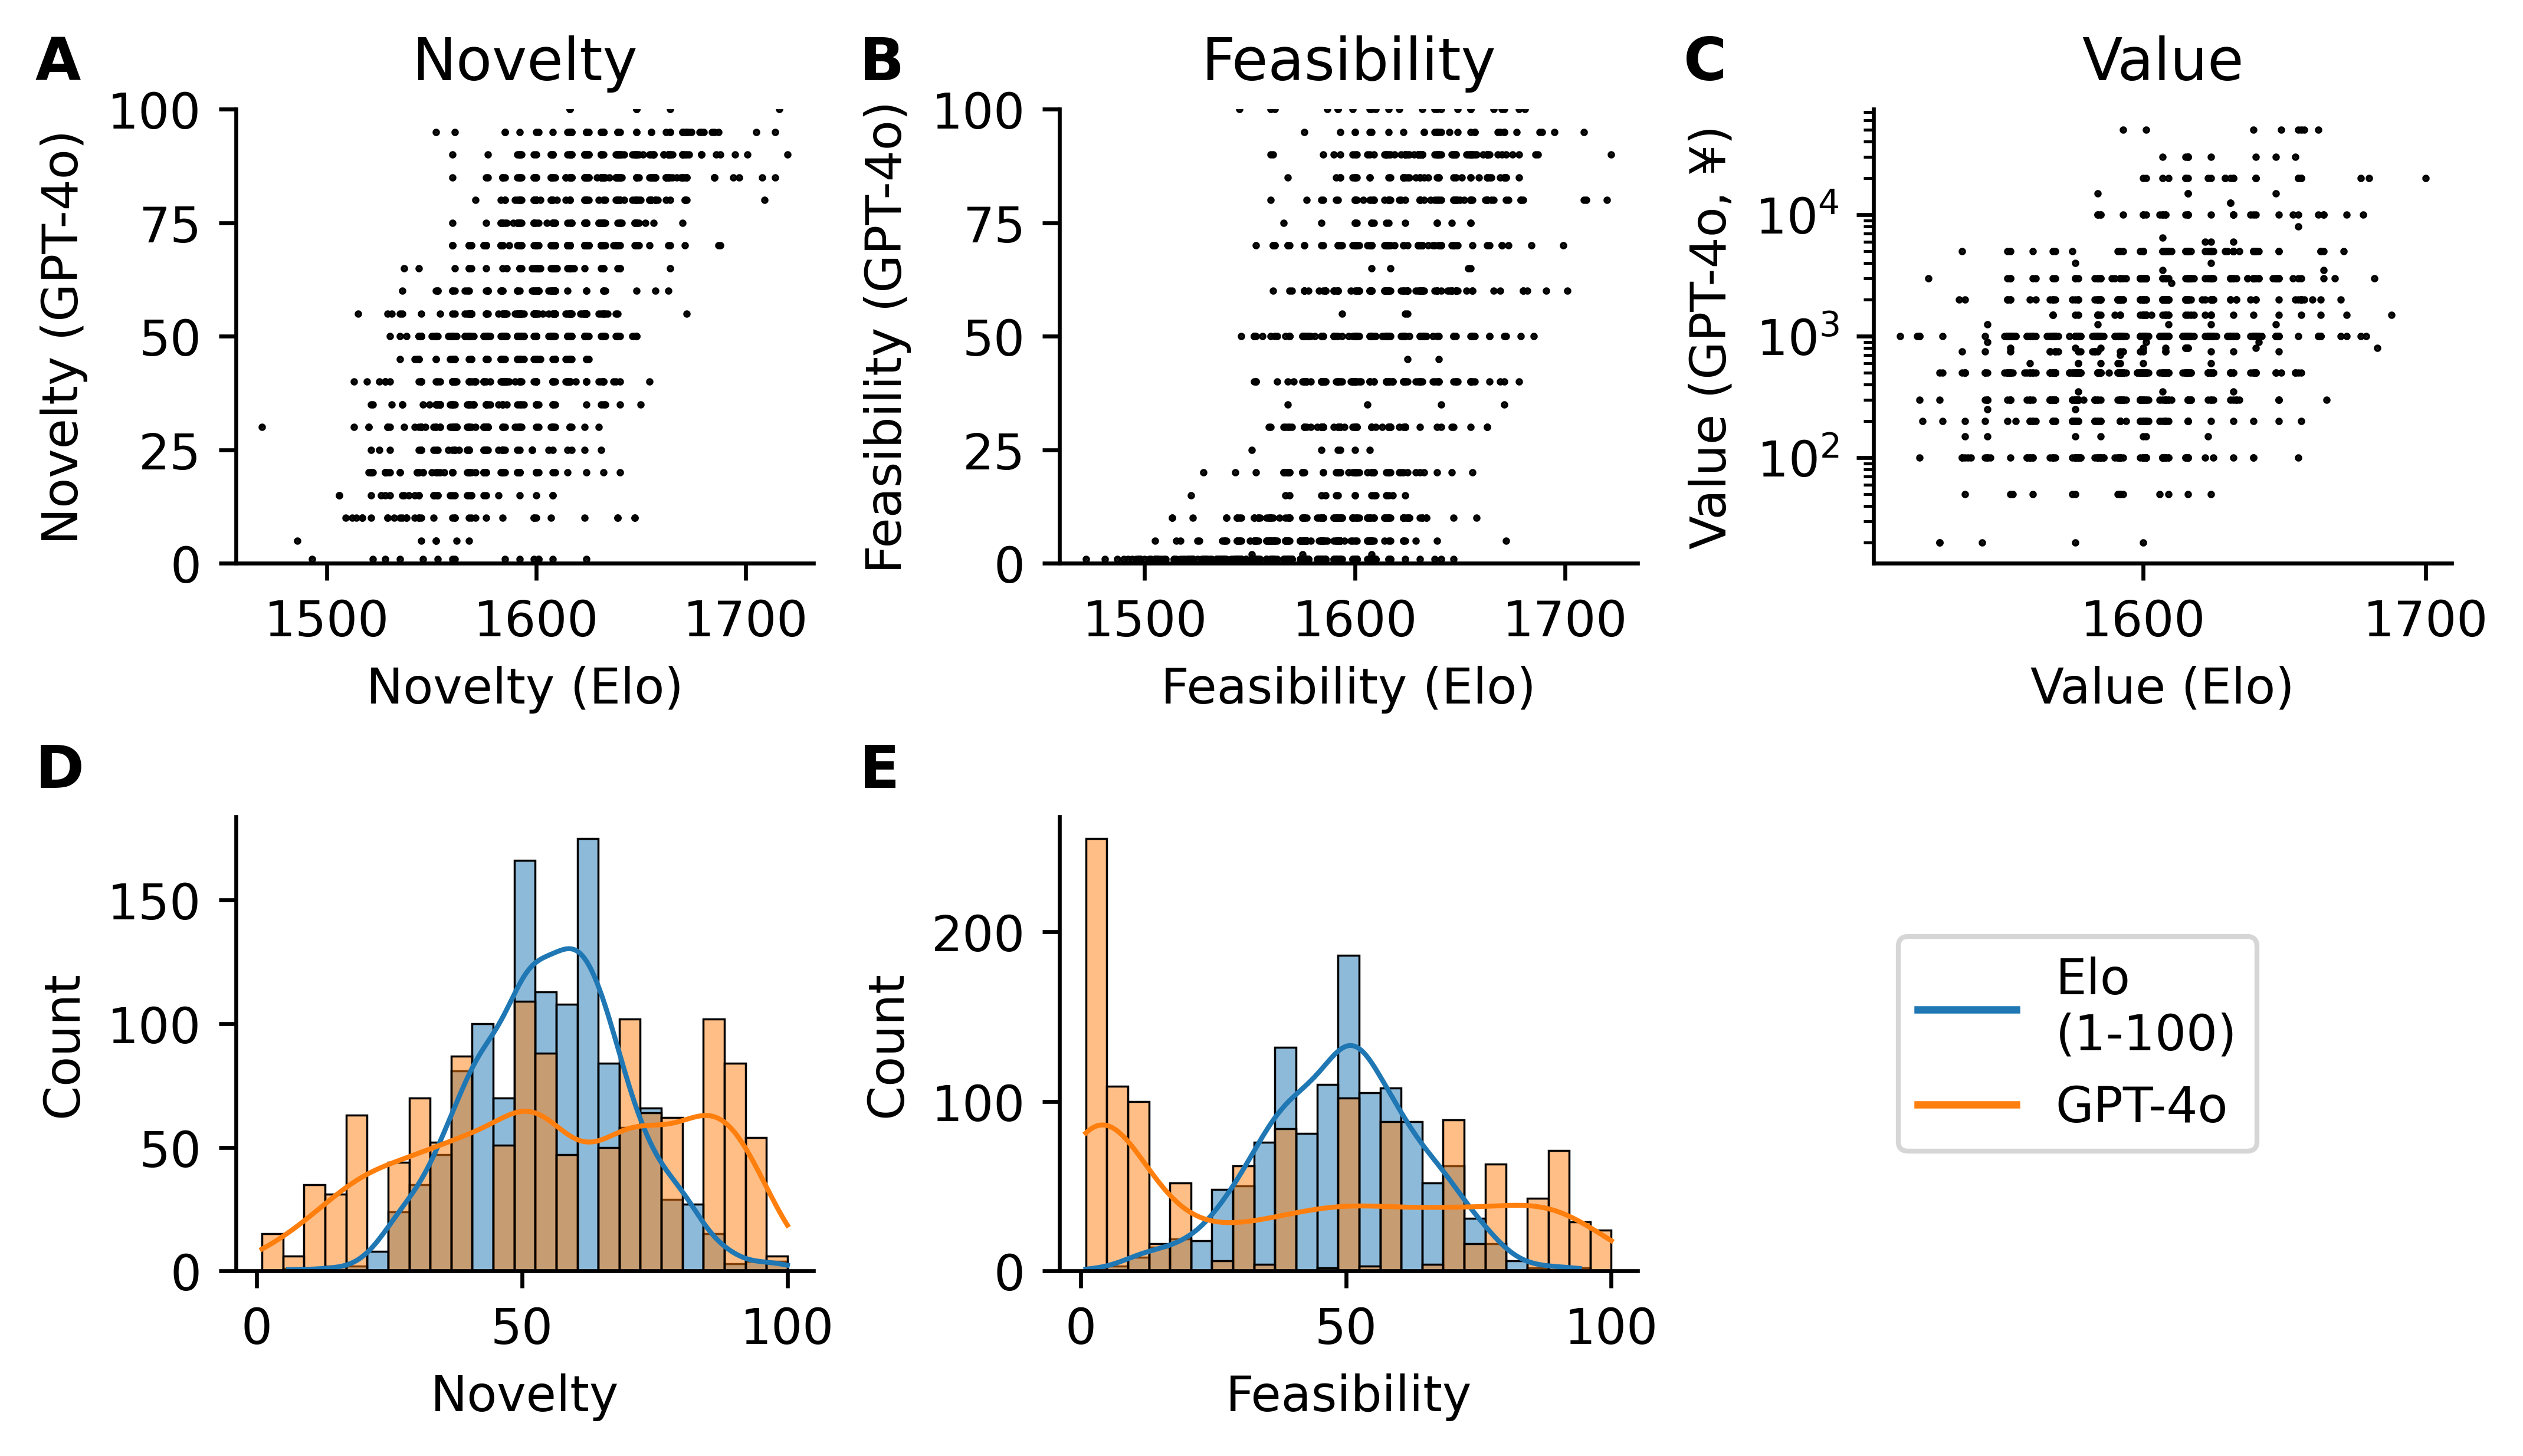

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(7,4), layout='constrained', dpi=600)
for measure, ax in zip(annotate.measures, axs.T):
    Measure = measure.capitalize()
    if measure == 'value':
        mask = (source['value']>0) & (source['value']<100000)
        suffix = ', ¥'
        ax[0].semilogy(source[mask][Measure], source[mask][measure], 'ok', ms=.5)
    else:
        suffix = ''
        ax[0].plot(source[Measure], source[measure], 'ok', ms=.5)
    ax[0].set_xlabel(f'{Measure} (Elo)')
    ax[0].set_ylabel(f'{Measure} (GPT-4o{suffix})')
    ax[0].set_title(Measure)
    if measure != 'value':
        ax[0].set_ylim(0,100)

    if measure != 'value':
        sns.histplot(source, x=f'{measure}_transformed', ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        sns.histplot(source, x=measure, ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        ax[1].set_xlabel(Measure)

axs[1,2].plot([], label='Elo\n(1-100)')
axs[1,2].plot([], label='GPT-4o')
axs[1,2].legend(loc='center left')
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

sns.despine()
sns.despine(ax=axs[1,2], bottom=True, left=True)

for i, ax in enumerate(axs.flatten()):
    if i < 5:
        plot_utils.label_panel(ax, i)

# plt.savefig(f'Figure_2.{fname}.pdf')

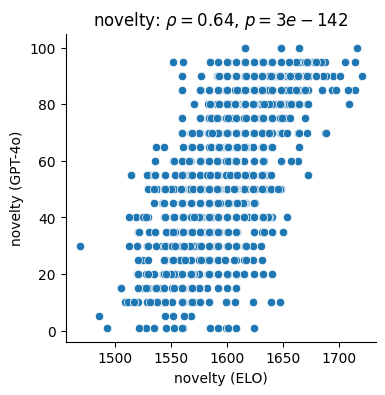

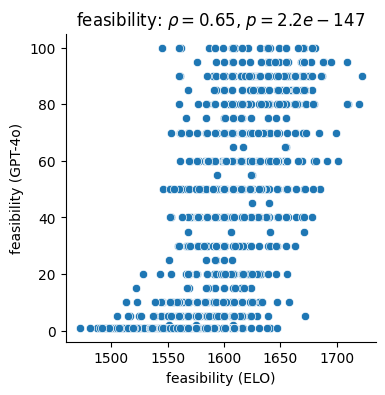

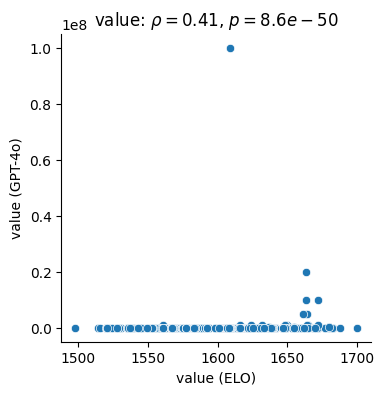

In [17]:
for key, c in corr.items():
    plt.figure(figsize=(4,4))
    sns.scatterplot(source, x=key.capitalize(), y=key)
    sns.despine()
    plt.xlabel(f'{key} (ELO)')
    plt.ylabel(f'{key} (GPT-4o)')
    plt.title(f'{key}: $\\rho = {c.statistic:.2g}$, $p = {c.pvalue:.2g}$')

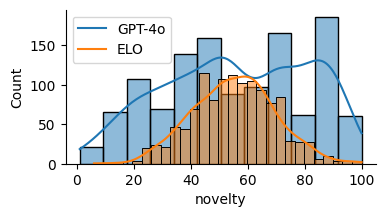

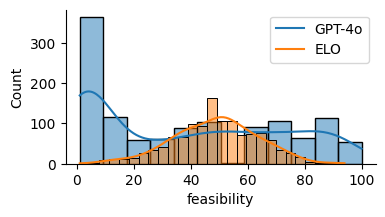

In [18]:
for key in ('novelty', 'feasibility'):
    fig, ax = plt.subplots(figsize=(4,2))
    sns.histplot(source, x=key, ax=ax, kde=True)
    sns.histplot(source, x=f'{key}_transformed', ax=ax, kde=True)
    sns.despine()
    plt.plot([], label='GPT-4o')
    plt.plot([], label='ELO')
    plt.legend()

In [19]:
for idx, row in source[source['value']<0].iterrows():
    print(row['Question'], row['Answer'], row['value_explanation'], sep='\n', end='\n\n')

In [20]:
for idx, row in source[source['value'] > 100000].iterrows():
    print(row['Question'], row['Answer'], row['value'], row['value_idea_explanation'], row['value_explanation'], sep='\n', end='\n\n')

金属の鍵
造金
100000000
1. Create gold
Existing products: Gold production and refining equipment.

木の箸
パソコン
125000
2. Use as a computer
Computers range from 50,000 to 200,000 JPY depending on specifications.

傘
パラシュート
200000
3. Parachute
Using an umbrella as a parachute.
Parachutes cost approximately 100,000 to 300,000 JPY.

ストロー
家の建築
1000000
3. House Construction
Building materials for houses are extremely expensive, often in the millions of JPY.

ボールペン
家
10000000
8. Use a ballpoint pen to build a house.
Existing products: Construction materials.

ろうそく
乗り物
1000000
7. 乗り物
Using a candle as a vehicle.
Vehicles are high-value items.

紙コップ
病院
1000000
11. Hospital
Medical facilities and equipment are highly valuable, often costing millions of yen.

新聞
エレベーター
1000000
12. Use as an elevator
Elevators are priced in the millions of JPY.

トイレットペーパー
家の建築
10000000
15. Using toilet paper to build a house.
Building materials for houses are extremely expensive, ranging from millions of JPY.

コルク
家の建築
5000

Text(0.5, 1.0, 'value: $\\rho = 0.38$, $p = 5.9e-41$')

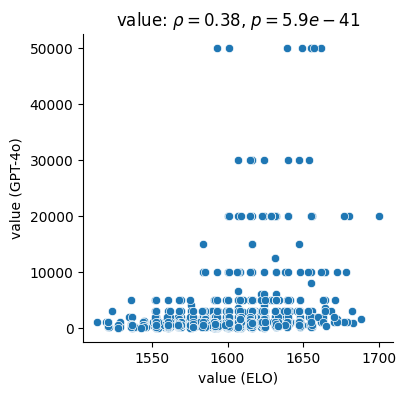

In [21]:
mask = (source['value']>0) & (source['value']<100000)
vcorr = stats.spearmanr(source[mask][['Value', 'value']])
plt.figure(figsize=(4,4))
sns.scatterplot(source[mask], x='Value', y='value')
sns.despine()
plt.xlabel(f'value (ELO)')
plt.ylabel(f'value (GPT-4o)')
plt.title(f'value: $\\rho = {vcorr.statistic:.2g}$, $p = {vcorr.pvalue:.2g}$')

In [22]:
print(source[(source['Question']=='ボールペン')*(source['Answer']=='冷蔵庫')]['novelty_raw'].item())

23. Use a ballpoint pen as a refrigerator.
This idea is extremely novel and imaginative, as it suggests a highly unconventional and abstract use.
{"novelty": 90}
